In [421]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [422]:
file_path_bevoelkerungsbestand = r'C:\Users\Startklar\Desktop\Project_Bern\bevoelkerungsbestand_seit_1941.xlsx'
file_path_bevoelkerungsbestand_und_haushalte = r'C:\Users\Startklar\Desktop\Project_Bern\bevoelkerungsbestand_und_haushalte_seit_1850.xlsx'
file_path_natuerliche = r'C:\Users\Startklar\Desktop\Project_Bern\natuerliche_bevoelkerungsbewegungen_seit_1890.xlsx'
file_path_wanderungsbewegungen = r'C:\Users\Startklar\Desktop\Project_Bern\wanderungsbewegungen_seit_1900.xlsx'


In [423]:
df1 = pd.read_excel(file_path_bevoelkerungsbestand, skiprows=7, nrows=52)
df2 = pd.read_excel(file_path_bevoelkerungsbestand_und_haushalte, skiprows=7, nrows=29)
df3 = pd.read_excel(file_path_natuerliche, skiprows=9, nrows=53)
df4 = pd.read_excel(file_path_wanderungsbewegungen, skiprows=7, nrows=52)
df2


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,absolut,in %,Unnamed: 7,Unnamed: 8
0,1850,29670,…,…,NaN,…,…,NaN,6071
1,1860,31050,…,…,NaN,138,0.47,NaN,6512
2,1870,37548,…,…,NaN,650,2.09,NaN,7530
3,1880,45743,…,…,NaN,820,2.18,NaN,9467
4,1888,48605,…,…,NaN,358,0.78,NaN,10435
5,1900,67550,61888,5662,NaN,1579,3.25,NaN,14579
6,1910,90937,81335,9602,NaN,2339,3.46,NaN,19982
7,1920,104626,95702,8924,NaN,1369,1.51,NaN,23957
8,1930,111783,104864,6919,NaN,716,0.68,NaN,29328
9,1941,130331,125793,4538,NaN,1686,1.51,NaN,38208


In [424]:
#First let's look df1: drop the NaN column + Rename columns 
df1.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'absolut', 'in ‰'],
      dtype='object')

In [425]:
df1 = df1.drop('Unnamed: 4', axis = 1)
df1 = df1.rename(columns={'Unnamed: 0': 'Year', 'Unnamed: 1': 'Population_Total', 'Unnamed: 2': 'Population_Natives',
                          'Unnamed: 3': 'Population_Immigrants', 'absolut': 'Absolute_values', 'in ‰': 'in_percentage'
}) #the columns 4 and 5 are counts with the total population. so it's possible to delate for this study. 
df1 = df1.drop(['Absolute_values', 'in_percentage'], axis = 1)
df1.head()

,Year,Population_Total,Population_Natives,Population_Immigrants
0,1941,130688,126463,4225
1,1945,137559,133673,3886
2,1950,146614,139654,6960
3,1955,153920,144742,9178
4,1960,161275,149202,12073


In [426]:
#The data points represent values at five-year intervals from 1941 to 1980. 
# To improve predictions, it would be beneficial to add values for the intervening years.df1['Year']
df1['Year'].head()

0    1941
1    1945
2    1950
3    1955
4    1960
Name: Year, dtype: int64

In [427]:
df1.duplicated().sum()

0

In [428]:
all_years = np.arange(df1['Year'].min(), df1['Year'].max() + 1)
df_complete = pd.DataFrame({'Year': all_years})
df_complete.head()

,Year
0,1941
1,1942
2,1943
3,1944
4,1945


In [429]:
df_concatenated = pd.concat([df1, df_complete], ignore_index=True)
df_concatenated.sort_values(by='Population_Total', inplace=True)
df_concatenated.head(25)
#Now we have to remove the duplicate values and fill up NaN values with the median

,Year,Population_Total,Population_Natives,Population_Immigrants
27,1999,126467.0,101236.0,25231.0
29,2001,126661.0,99912.0,26749.0
28,2000,126752.0,100586.0,26166.0
26,1998,126886.0,102082.0,24804.0
30,2002,127330.0,100006.0,27324.0
32,2004,127352.0,100117.0,27235.0
33,2005,127421.0,100286.0,27135.0
31,2003,127519.0,100269.0,27250.0
34,2006,127882.0,100914.0,26968.0
35,2007,128345.0,101090.0,27255.0


In [430]:
df_concatenated = df_concatenated.drop_duplicates(subset='Year', keep = 'first')
#df_concatenated = df_concatenated.drop_duplicates(subset='Year', keep='last', ignore_index=True)
df_concatenated.sort_values(by='Year', inplace=True)
df_concatenated


,Year,Population_Total,Population_Natives,Population_Immigrants
0,1941,130688.0,126463.0,4225.0
53,1942,NaN,NaN,NaN
54,1943,NaN,NaN,NaN
55,1944,NaN,NaN,NaN
1,1945,137559.0,133673.0,3886.0
57,1946,NaN,NaN,NaN
58,1947,NaN,NaN,NaN
59,1948,NaN,NaN,NaN
60,1949,NaN,NaN,NaN
2,1950,146614.0,139654.0,6960.0


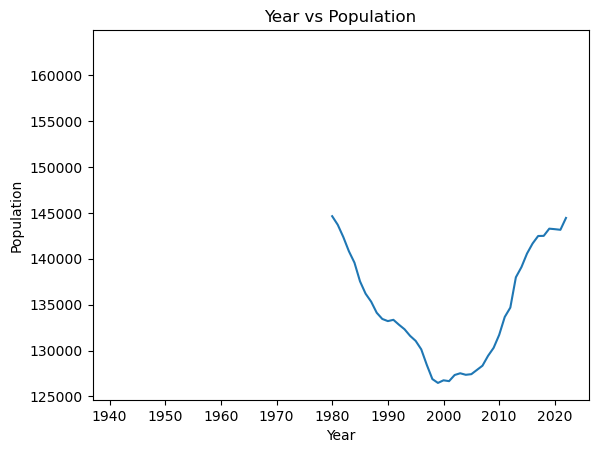

In [431]:
#Now fill.na
plt.plot(df_concatenated['Year'], df_concatenated['Population_Total'])
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Year vs Population')
plt.show()

In [432]:
df_concatenated = df_concatenated.interpolate(method='linear')
df_concatenated.head(20)

,Year,Population_Total,Population_Natives,Population_Immigrants
0,1941,130688.00,126463.0,4225.00
53,1942,132405.75,128265.5,4140.25
54,1943,134123.50,130068.0,4055.50
55,1944,135841.25,131870.5,3970.75
1,1945,137559.00,133673.0,3886.00
57,1946,139370.00,134869.2,4500.80
58,1947,141181.00,136065.4,5115.60
59,1948,142992.00,137261.6,5730.40
60,1949,144803.00,138457.8,6345.20
2,1950,146614.00,139654.0,6960.00


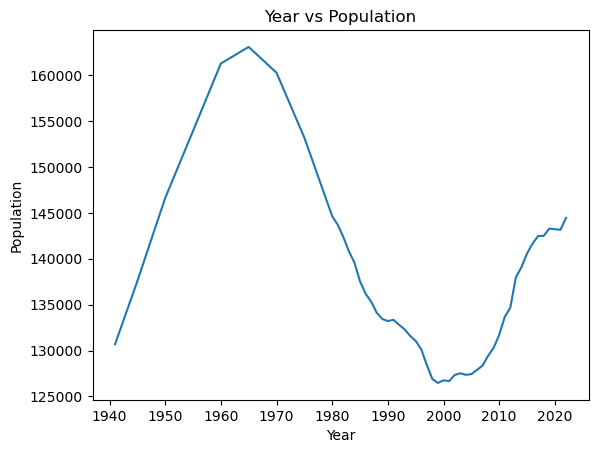

In [433]:
plt.plot(df_concatenated['Year'], df_concatenated['Population_Total'])
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Year vs Population')
plt.show()

In [434]:
df1 = df_concatenated
#df_population = df_concatenated.set_index('Year')
#df_population.head()

In [435]:
#Let's take a look in df2
df2.head()
#The only think important here is the last column, as the data before is already computed

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,absolut,in %,Unnamed: 7,Unnamed: 8
0,1850,29670,…,…,NaN,…,…,NaN,6071
1,1860,31050,…,…,NaN,138,0.47,NaN,6512
2,1870,37548,…,…,NaN,650,2.09,NaN,7530
3,1880,45743,…,…,NaN,820,2.18,NaN,9467
4,1888,48605,…,…,NaN,358,0.78,NaN,10435


In [436]:
df2.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'absolut', 'in %', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [437]:
df2 = df2.rename(columns={'Unnamed: 0': 'Year', 'Unnamed: 8': 'House_Hold'
})
df2 = df2[['Year', 'House_Hold']]
df2.head(20)

,Year,House_Hold
0,1850,6071
1,1860,6512
2,1870,7530
3,1880,9467
4,1888,10435
5,1900,14579
6,1910,19982
7,1920,23957
8,1930,29328
9,1941,38208


In [438]:
#to match df1, it's possible to delate the data <1941
df2.dtypes

Year           int64
House_Hold    object
dtype: object

In [439]:
#df2['House_Hold'] = df2['House_Hold'].astype(int)

df2 = df2.drop(df2[(df2['Year'] > 2000) & (df2['Year'] < 2012) ].index)
df2

,Year,House_Hold
0,1850,6071
1,1860,6512
2,1870,7530
3,1880,9467
4,1888,10435
5,1900,14579
6,1910,19982
7,1920,23957
8,1930,29328
9,1941,38208


In [440]:
df2 = df2.drop(df2[(df2['Year'] < 1941)].index)
df2

,Year,House_Hold
9,1941,38208
10,1950,45501
11,1960,54704
12,1970,62522
13,1980,69836
14,1990,69862
15,2000,68933
18,2012,66709
19,2013,65082
20,2014,64708


In [441]:
df2['House_Hold'] = df2['House_Hold'].astype(int)


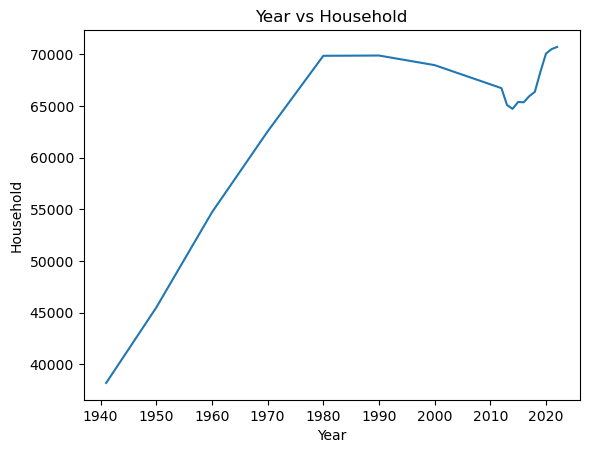

In [442]:
plt.plot(df2['Year'], df2['House_Hold'])
plt.xlabel('Year')
plt.ylabel('Household')
plt.title('Year vs Household')
plt.show()

In [443]:
df2 = pd.concat([df2, df_complete], ignore_index=True)
df2.sort_values(by='House_Hold', inplace=True)
df2.head(25)

,Year,House_Hold
0,1941,38208.0
1,1950,45501.0
2,1960,54704.0
3,1970,62522.0
9,2014,64708.0
8,2013,65082.0
11,2016,65339.0
10,2015,65371.0
12,2017,65933.0
13,2018,66352.0


In [444]:
df2 = df2.drop_duplicates(subset='Year', keep = 'first')
df2 .sort_values(by='Year', inplace=True)
df2 

,Year,House_Hold
0,1941,38208.0
19,1942,NaN
20,1943,NaN
21,1944,NaN
22,1945,NaN
23,1946,NaN
24,1947,NaN
25,1948,NaN
26,1949,NaN
1,1950,45501.0


In [445]:
df2 = df2.interpolate(method='linear')
df2.head(20)

,Year,House_Hold
0,1941,38208.000000
19,1942,39018.333333
20,1943,39828.666667
21,1944,40639.000000
22,1945,41449.333333
23,1946,42259.666667
24,1947,43070.000000
25,1948,43880.333333
26,1949,44690.666667
1,1950,45501.000000


In [446]:
df2['House_Hold'] = df2['House_Hold'].astype(int)
df2.head()



,Year,House_Hold
0,1941,38208
19,1942,39018
20,1943,39828
21,1944,40639
22,1945,41449


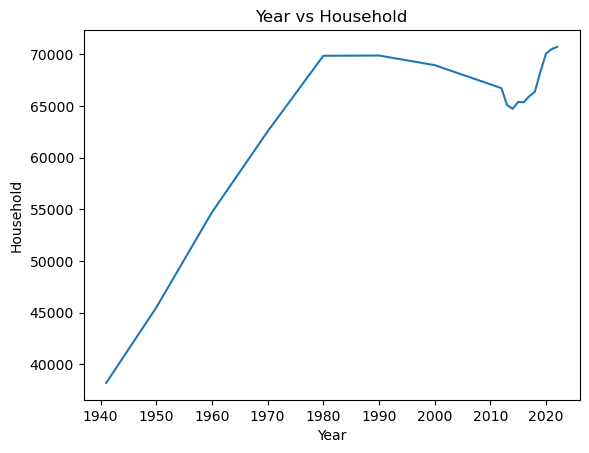

In [447]:
plt.plot(df2['Year'], df2['House_Hold'])
plt.xlabel('Year')
plt.ylabel('Household')
plt.title('Year vs Household')
plt.show()